# Question Two - South German Credit Data

### Import Required Libraries

In [1]:
# Reading / Writing Files & Encoding
import pandas as pd
import numpy as np

# Pre-Processing
from sklearn.model_selection import train_test_split

# Sampling
from imblearn.over_sampling import SMOTE

# Clustering
from sklearn.cluster import KMeans

# Feature Selection / Extraction
from sklearn.model_selection import train_test_split
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.feature_selection import chi2, SelectKBest, SelectFromModel
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer

# Ensembles & Functions
from vecstack import stacking
from sklearn.svm import LinearSVC as svc
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier

# Accuracy
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, silhouette_score

# Miscellaneous
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")

### Load in Dataset | Perform Basic Preparation

In [2]:
df = pd.read_csv("./data/assignment_five/south_german_credit.csv")
X = df.drop(['kredit'], axis=1)
y = df['kredit']

### Construct a Train-Test Split

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.85, random_state=42)

# K-Means Clustering

In [4]:
clusters = [i*10 for i in range(1,11)]
score = []
for c in clusters:
    kmeans = KMeans(n_clusters=c, init='random', algorithm='elkan')
    kmeans.fit(X_train)
    print(f"Silhouette Score for {c} Clusters: {round(silhouette_score(X_train, kmeans.labels_),6)}")
    score.append(round(silhouette_score(X_train, kmeans.labels_),3))

Silhouette Score for 10 Clusters: 0.56383
Silhouette Score for 20 Clusters: 0.522072
Silhouette Score for 30 Clusters: 0.519251
Silhouette Score for 40 Clusters: 0.489785
Silhouette Score for 50 Clusters: 0.496425
Silhouette Score for 60 Clusters: 0.457043
Silhouette Score for 70 Clusters: 0.467652
Silhouette Score for 80 Clusters: 0.434966
Silhouette Score for 90 Clusters: 0.42309
Silhouette Score for 100 Clusters: 0.40017


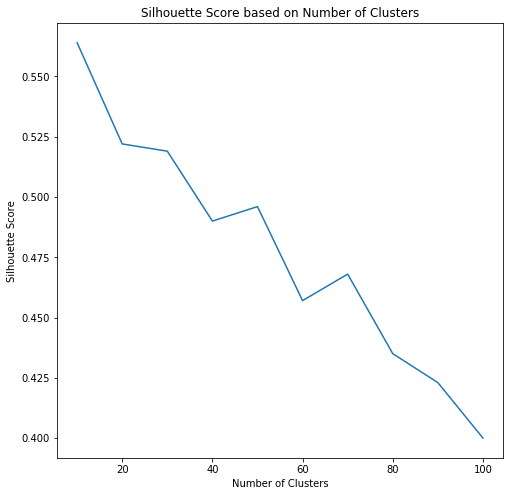

In [5]:
plt.figure(figsize=(8,8))
plt.plot(clusters, score)
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title("Silhouette Score based on Number of Clusters")
plt.show()

In [6]:
clusters = [i*100 for i in range(1,9)]
score = []
for c in clusters:
    kmeans = KMeans(n_clusters=c, init='random', algorithm='elkan')
    kmeans.fit(X_train)
    #print(f"Silhouette Score for {c} Clusters: {round(silhouette_score(X_train, kmeans.labels_),6)}")
    score.append(round(silhouette_score(X_train, kmeans.labels_),3))

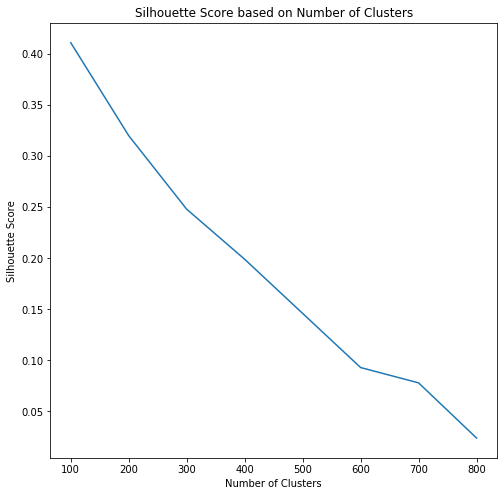

In [7]:
plt.figure(figsize=(8,8))
plt.plot(clusters, score)
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title("Silhouette Score based on Number of Clusters")
plt.show()

In [8]:
kmeans = KMeans(n_clusters=40, init='random', algorithm='elkan')
kmeans.fit(X_train)
predicted_clusters_train = kmeans.predict(X_train)
kmeans.fit(X_test)
predicted_clusters_test = kmeans.predict(X_test)
kmeans.fit(df)
predicted_clusters_df = kmeans.predict(df)

In [9]:
X_train['Cluster'] = predicted_clusters_train
X_test['Cluster'] = predicted_clusters_test
df['Cluster'] = predicted_clusters_df
X_train.head()

,laufkont,laufzeit,moral,verw,hoehe,sparkont,beszeit,rate,famges,buerge,...,verm,alter,weitkred,wohn,bishkred,beruf,pers,telef,gastarb,Cluster
643,1,48,4,1,6143,1,5,4,2,1,...,4,58,2,3,2,2,2,1,2,15
158,2,48,1,9,6416,1,5,4,2,1,...,4,59,3,1,1,3,2,1,2,31
977,1,6,2,0,14896,1,5,1,3,1,...,4,68,1,2,1,4,2,2,2,23
429,2,9,2,0,3195,5,3,1,2,1,...,1,33,3,2,1,2,2,1,2,38
941,2,12,2,0,888,1,5,4,3,1,...,3,41,1,2,1,2,1,1,2,9


# Feature Selection

In [10]:
selector = SelectKBest(score_func=chi2, k=10)
selector.fit_transform(X_train, y_train)
cols = selector.get_support(indices=True)

selected_features_df = X_train.iloc[:,cols]
selected_features_df.head()

,laufkont,laufzeit,moral,hoehe,sparkont,beszeit,rate,verm,alter,weitkred
643,1,48,4,6143,1,5,4,4,58,2
158,2,48,1,6416,1,5,4,4,59,3
977,1,6,2,14896,1,5,1,4,68,1
429,2,9,2,3195,5,3,1,1,33,3
941,2,12,2,888,1,5,4,3,41,1


# Predict Target Value Using Classifiers

In [11]:
def accuracy_output(model):
    print("=== ACCURACY ===")
    print(round(model.score(X_test[selected_features_df.keys()], y_test),6))

In [12]:
def confusion_output(y_test,X_test_prediction):
    print("=== CONFUSION MATRIX ===")
    print(confusion_matrix(y_test, X_test_prediction))

### 1. Decision Tree Classifier

In [13]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train[selected_features_df.keys()], y_train)
decision_tree_prediction = decision_tree.predict(X_test[selected_features_df.keys()])

In [14]:
accuracy_output(decision_tree)
confusion_output(y_test, decision_tree_prediction)

=== ACCURACY ===
0.7
=== CONFUSION MATRIX ===
[[17 29]
 [16 88]]


### 2. Random Forest Classifier

In [15]:
random_forest = RandomForestClassifier()
random_forest.fit(X_train[selected_features_df.keys()], y_train)
random_forest_prediction = random_forest.predict(X_test[selected_features_df.keys()])

In [16]:
accuracy_output(random_forest)
confusion_output(y_test, random_forest_prediction)

=== ACCURACY ===
0.773333
=== CONFUSION MATRIX ===
[[21 25]
 [ 9 95]]


### 2.1 Random Forest Classifier - Hyperparameter Tuning

In [17]:
random_parameters = {
    'min_samples_leaf' : [i for i in range(1,5)],
    'max_depth': [i*5 for i in range(10,20)],
    'n_estimators':[i*5 for i in range(5,15)]
}

In [18]:
random_forest_random = RandomizedSearchCV(random_forest,random_parameters,n_iter=50,cv=5,n_jobs=-1,verbose=False)
random_forest_random.fit(X_train[selected_features_df.keys()], y_train)
random_forest_random_params = random_forest_random.best_params_
random_forest_random_params

{'n_estimators': 40, 'min_samples_leaf': 2, 'max_depth': 60}

In [19]:
random_forest = RandomForestClassifier(**random_forest_random_params)
random_forest.fit(X_train[selected_features_df.keys()], y_train)
random_forest_prediction = random_forest.predict(X_test[selected_features_df.keys()])

In [20]:
accuracy_output(random_forest)
confusion_output(y_test, random_forest_prediction)

=== ACCURACY ===
0.793333
=== CONFUSION MATRIX ===
[[24 22]
 [ 9 95]]


### 3. Linear Support Vector Classifier

In [21]:
support_vector_machines = svc()
support_vector_machines.fit(X_train[selected_features_df.keys()], y_train)
support_vector_prediction = support_vector_machines.predict(X_test[selected_features_df.keys()])

In [22]:
accuracy_output(support_vector_machines)
confusion_output(y_test, support_vector_prediction)

=== ACCURACY ===
0.326667
=== CONFUSION MATRIX ===
[[ 46   0]
 [101   3]]


### 4. K-Nearest Neighbors Classifier

In [23]:
k_neighbors = KNeighborsClassifier()
k_neighbors.fit(X_train[selected_features_df.keys()], y_train)
k_neighbors_prediction = k_neighbors.predict(X_test[selected_features_df.keys()])

In [24]:
accuracy_output(k_neighbors)
confusion_output(y_test, k_neighbors_prediction)

=== ACCURACY ===
0.64
=== CONFUSION MATRIX ===
[[ 7 39]
 [15 89]]


### 5. Multilayer Perceptron Classifier

In [25]:
multilayer_perceptron = MLPClassifier()
multilayer_perceptron.fit(X_train[selected_features_df.keys()], y_train)
multilayer_perceptron_prediction = multilayer_perceptron.predict(X_test[selected_features_df.keys()])

In [26]:
accuracy_output(multilayer_perceptron)
confusion_output(y_test, multilayer_perceptron_prediction)

=== ACCURACY ===
0.693333
=== CONFUSION MATRIX ===
[[  0  46]
 [  0 104]]


### 5.1 Multilayer Perceptron Classifier - Hyperparameter Tuning

In [27]:
m_layer_parameters = {
    'activation':['identity', 'logistic', 'tanh', 'relu'],
    'learning_rate_init':[i/1000 for i in range(1,5)],
    'max_iter':[i*50 for i in range(2,6)],
    'tol':[i/10000 for i in range(2,5)]
}

In [28]:
m_layer_random = RandomizedSearchCV(multilayer_perceptron,m_layer_parameters,n_iter=10,cv=5,n_jobs=-1,verbose=False)
m_layer_random.fit(X_train[selected_features_df.keys()], y_train)
m_layer_random_params = m_layer_random.best_params_
m_layer_random_params

{'tol': 0.0003,
 'max_iter': 100,
 'learning_rate_init': 0.003,
 'activation': 'relu'}

In [29]:
multilayer_perceptron = MLPClassifier(**m_layer_random_params)
multilayer_perceptron.fit(X_train[selected_features_df.keys()], y_train)
multilayer_perceptron_prediction = multilayer_perceptron.predict(X_test[selected_features_df.keys()])

### 6. Gradient Boosting Classifier

In [30]:
gradient_boosting = GradientBoostingClassifier()
gradient_boosting.fit(X_train[selected_features_df.keys()], y_train)
gradient_boosting_prediction = gradient_boosting.predict(X_test[selected_features_df.keys()])

In [31]:
accuracy_output(gradient_boosting)
confusion_output(y_test, gradient_boosting_prediction)

=== ACCURACY ===
0.74
=== CONFUSION MATRIX ===
[[20 26]
 [13 91]]


### 6.1 Gradient Boosting Classifier - Hyperparameter Tuning

In [32]:
g_boosting_parameters = {
    'criterion':['friedman_mse','mse','mae'],
    'min_samples_split':[i*2 for i in range(1,5)]
}

In [33]:
g_boosting_random = RandomizedSearchCV(gradient_boosting,g_boosting_parameters,n_iter=5,cv=5,n_jobs=-1,verbose=False)
g_boosting_random.fit(X_train[selected_features_df.keys()], y_train)
g_boosting_random_params = g_boosting_random.best_params_
g_boosting_random_params

{'min_samples_split': 8, 'criterion': 'mae'}

In [34]:
gradient_boosting = GradientBoostingClassifier(**g_boosting_random_params)
gradient_boosting.fit(X_train[selected_features_df.keys()], y_train)
gradient_boosting_prediction = gradient_boosting.predict(X_test[selected_features_df.keys()])

In [35]:
accuracy_output(gradient_boosting)
confusion_output(y_test, gradient_boosting_prediction)

=== ACCURACY ===
0.713333
=== CONFUSION MATRIX ===
[[  7  39]
 [  4 100]]


### 7. Gradient Descent Classifier

In [36]:
gradient_descent = SGDClassifier()
gradient_descent.fit(X_train[selected_features_df.keys()], y_train)
gradient_descent_prediction = gradient_descent.predict(X_test[selected_features_df.keys()])

In [37]:
accuracy_output(gradient_descent)
confusion_output(y_test, gradient_descent_prediction)

=== ACCURACY ===
0.693333
=== CONFUSION MATRIX ===
[[  0  46]
 [  0 104]]


### 7.1 Gradient Descent Classifier - Hyperparameter Tuning

In [38]:
g_descent_parameters = {
    'tol':[i/10000 for i in range(1,5)],
    'penalty':['l2', 'l1', 'elasticnet'],
    'max_iter':[i*100 for i in range(2,6)]
}

In [39]:
g_descent_random = RandomizedSearchCV(gradient_descent, g_descent_parameters, n_iter=50, cv=5, n_jobs=-1, verbose=False)
g_descent_random.fit(X_train[selected_features_df.keys()], y_train)
g_descent_random_params = g_descent_random.best_params_
g_descent_random_params

{'tol': 0.0003, 'penalty': 'elasticnet', 'max_iter': 300}

In [40]:
gradient_descent = SGDClassifier(**g_descent_random_params)
gradient_descent.fit(X_train[selected_features_df.keys()], y_train)
gradient_descent_prediction = gradient_descent.predict(X_test[selected_features_df.keys()])

In [41]:
accuracy_output(gradient_descent)
confusion_output(y_test, gradient_descent_prediction)

=== ACCURACY ===
0.693333
=== CONFUSION MATRIX ===
[[  0  46]
 [  0 104]]


# Stacked Model With Hyperparameter Tuning

In [42]:
models = [
    RandomForestClassifier(**random_forest_random_params),
    GradientBoostingClassifier(**g_boosting_random_params),
    SGDClassifier(**g_descent_random_params)
]

stack_train, stack_test = stacking(models,                   
    X_train[selected_features_df.keys()], y_train, df[selected_features_df.keys()],   
    regression=True, 
    mode='oof_pred_bag', 
    needs_proba=False,
    save_dir=None,
    n_folds=10, 
    stratified=True,
    shuffle=True,  
    random_state=0)

In [43]:
results = {
    'r_forest':RandomForestClassifier(**random_forest_random_params).fit(stack_train,y_train).predict(stack_test),
    'mlp':MLPClassifier(**m_layer_random_params).fit(stack_train,y_train).predict(stack_test),
    'g_boost':GradientBoostingClassifier(**g_boosting_random_params).fit(stack_train,y_train).predict(stack_test),
    'g_desc':SGDClassifier(**g_descent_random_params).fit(stack_train,y_train).predict(stack_test)
}

results_df = pd.DataFrame(data=results)
results_df

,r_forest,mlp,g_boost,g_desc
0,1,1,1,1
1,1,1,1,1
2,1,1,1,1
3,1,1,1,1
4,1,1,1,1
...,...,...,...,...
995,0,0,0,0
996,0,0,0,0
997,0,0,0,1
998,1,1,1,1


# Accuracy Check

### Random Forest Classifier

In [44]:
print(f"Accuracy Score: {round(accuracy_score(df['kredit'], results_df['r_forest']),6)}")
confusion_output(df['kredit'], results_df['r_forest'])

Accuracy Score: 0.918
=== CONFUSION MATRIX ===
[[253  47]
 [ 35 665]]


### Multilayer Perceptron

In [45]:
print(f"Accuracy Score: {round(accuracy_score(df['kredit'], results_df['mlp']),6)}")
confusion_output(df['kredit'], results_df['mlp'])

Accuracy Score: 0.894
=== CONFUSION MATRIX ===
[[202  98]
 [  8 692]]


### Gradient Boosting

In [46]:
print(f"Accuracy Score: {round(accuracy_score(df['kredit'], results_df['g_boost']),6)}")
confusion_output(df['kredit'], results_df['g_boost'])

Accuracy Score: 0.918
=== CONFUSION MATRIX ===
[[253  47]
 [ 35 665]]


### Gradient Descent

In [47]:
print(f"Accuracy Score: {round(accuracy_score(df['kredit'], results_df['g_desc']),6)}")
confusion_output(df['kredit'], results_df['g_desc'])

Accuracy Score: 0.922
=== CONFUSION MATRIX ===
[[233  67]
 [ 11 689]]
